# Calculons des variables d'observations (représentation des données)

## percent_err

Pour commencer, le calcul de percent_err est le suivant :
$$ erreurSujet = \sum(recoData_i - posCt_{i-1})^2$$  
$$ erreur100percent = \sum(posCt{})^2$$  
$$percentErr = 100 * \frac{erreurSujet}{erreur100percent}$$

Nous pouvons recalculer `percent_err` car il n'a pas été calculé sur nos données brutes rendues homogène à travers les essais et sujets.


In [46]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
import pandas as pd

In [2]:
DATA_TEMPO = pd.read_csv("data_tempo.zip", index_col=0)
DATA_TEMPO

pos_ct_sujet4_pos_ent_0.2_pc_3  \
2021-07-01 00:00:00.000                      -95.829486   
2021-07-01 00:00:00.020                      -27.483225   
2021-07-01 00:00:00.040                      -27.466590   
2021-07-01 00:00:00.060                      -27.451068   
2021-07-01 00:00:00.080                      -27.436039   
...                                                 ...   
2021-07-01 00:02:29.860                             NaN   
2021-07-01 00:02:29.880                             NaN   
2021-07-01 00:02:29.900                             NaN   
2021-07-01 00:02:29.920                             NaN   
2021-07-01 00:02:29.940                             NaN   

                         reco_data_sujet4_pos_ent_0.2_pc_3  \
2021-07-01 00:00:00.000                           4.373268   
2021-07-01 00:00:00.020                           4.580904   
2021-07-01 00:00:00.040                           4.750773   
2021-07-01 00:00:00.060                           4.837929   
2021-07-01 00:00:00.080                           5.183406   
...                                                    ...   
2021-07-01 00:02:29.860                                NaN   
2021-07-01 00:02:29.880                                NaN   
2021-07-01 00:02:29.900                                NaN   
2021-07-01 00:02:29.920                                NaN   
2021-07-01 00:02:29.940                                NaN   

                         fb_err_sujet4_pos_ent_0.2_pc_3  \
2021-07-01 00:00:00.000                      100.202754   
2021-07-01 00:00:00.020                       32.064129   
2021-07-01 00:00:00.040                       32.217363   
2021-07-01 00:00:00.060                       32.288998   
2021-07-01 00:00:00.080                       32.619444   
...                                                 ...   
2021-07-01 00:02:29.860                             NaN   
2021-07-01 00:02:29.880                             NaN   
2021-07-01 00:02:29.900                             NaN   
2021-07-01 00:02:29.920                             NaN   
2021-07-01 00:02:29.940                             NaN   

                         pos_ct_sujet4_pos_ent_0.4_pe_8  \
2021-07-01 00:00:00.000                      153.123354   
2021-07-01 00:00:00.020                      -30.791920   
2021-07-01 00:00:00.040                      -30.789780   
2021-07-01 00:00:00.060                      -30.796271   
2021-07-01 00:00:00.080                      -30.821457   
...                                                 ...   
2021-07-01 00:02:29.860                             NaN   
2021-07-01 00:02:29.880                             NaN   
2021-07-01 00:02:29.900                             NaN   
2021-07-01 00:02:29.920                             NaN   
2021-07-01 00:02:29.940                             NaN   

                         reco_data_sujet4_pos_ent_0.4_pe_8  \
2021-07-01 00:00:00.000                           1.393431   
2021-07-01 00:00:00.020                           1.780493   
2021-07-01 00:00:00.040                           1.844312   
2021-07-01 00:00:00.060                           1.837883   
2021-07-01 00:00:00.080                           1.952696   
...                                                    ...   
2021-07-01 00:02:29.860                                NaN   
2021-07-01 00:02:29.880                                NaN   
2021-07-01 00:02:29.900                                NaN   
2021-07-01 00:02:29.920                                NaN   
2021-07-01 00:02:29.940                                NaN   

                         fb_err_sujet4_pos_ent_0.4_pe_8  \
2021-07-01 00:00:00.000                     -151.729923   
2021-07-01 00:00:00.020                       32.572413   
2021-07-01 00:00:00.040                       32.634092   
2021-07-01 00:00:00.060                       32.634154   
2021-07-01 00:00:00.080                       32.774153   
...                                                 ..

In [3]:
DATA_STATIC = pd.read_csv("data_static.zip", index_col=0)
DATA_STATIC['num_essai'] = DATA_STATIC['num_essai'].apply(str)
DATA_STATIC['cutoff'] = DATA_STATIC['cutoff'].apply(str)
DATA_STATIC.head()

name  force_level num_essai ctrl phase cutoff tracking  percent_err
0  sujet4    24.201755         3  pos   ent    0.2       pc     1.734608
1  sujet4    24.201755        15  pos  test    0.6       pc    10.734347
2  sujet4    24.201755         8  pos   ent    0.4       pe     9.537062
3  sujet4    24.201755        16  pos  test    0.4       pe    11.045245
4  sujet4    24.201755        19  pos  test    0.6       pc    12.734193

Présenter les 4 solutions :
- option converters (il faut une connaissance à priori)
- option dtype (on doit observer une différence en mémoire et avoir une connaissance à priori si type de fichier plat vs orienté objet)
- conversion en str (à faire à chaque fois)
- modification en "'0.2'" (la solution la plus stable dans le temps)

In [4]:
DATA_STATIC.index = DATA_STATIC[['name', 'ctrl', 'phase', 'cutoff', 'tracking', 'num_essai']].apply(lambda x: '_'.join(x), axis=1)
DATA_STATIC

name  force_level num_essai ctrl phase cutoff  \
sujet4_pos_ent_0.2_pc_3      sujet4    24.201755         3  pos   ent    0.2   
sujet4_pos_test_0.6_pc_15    sujet4    24.201755        15  pos  test    0.6   
sujet4_pos_ent_0.4_pe_8      sujet4    24.201755         8  pos   ent    0.4   
sujet4_pos_test_0.4_pe_16    sujet4    24.201755        16  pos  test    0.4   
sujet4_pos_test_0.6_pc_19    sujet4    24.201755        19  pos  test    0.6   
...                             ...          ...       ...  ...   ...    ...   
sujet17_vit_ent_0.4_pe_11   sujet17    29.014568        11  vit   ent    0.4   
sujet17_vit_test_0.6_pc_14  sujet17    29.014568        14  vit  test    0.6   
sujet17_vit_ent_0.3_pe_5    sujet17    29.014568         5  vit   ent    0.3   
sujet17_vit_ent_0.4_pc_8    sujet17    29.014568         8  vit   ent    0.4   
sujet17_vit_ent_0.2_pe_3    sujet17    29.014568         3  vit   ent    0.2   

                           tracking  percent_err  
sujet4_pos_ent_0.2_pc_3          pc     1.734608  
sujet4_pos_test_0.6_pc_15        pc    10.734347  
sujet4_pos_ent_0.4_pe_8          pe     9.537062  
sujet4_pos_test_0.4_pe_16        pe    11.045245  
sujet4_pos_test_0.6_pc_19        pc    12.734193  
...                             ...          ...  
sujet17_vit_ent_0.4_pe_11        pe    60.553810  
sujet17_vit_test_0.6_pc_14       pc    42.093258  
sujet17_vit_ent_0.3_pe_5         pe    47.538546  
sujet17_vit_ent_0.4_pc_8         pc    19.117236  
sujet17_vit_ent_0.2_pe_3         pe    13.138364  

[440 rows x 8 columns]

In [5]:
rms_erreur100percent = {x.replace('pos_ct_', ''): np.sqrt(np.nanmean(DATA_TEMPO[x].values**2)) for x in DATA_TEMPO.filter(regex='pos_ct').columns.to_list()}
DATA_STATIC['rms_erreur100percent'] = pd.Series(rms_erreur100percent)
DATA_STATIC

name  force_level num_essai ctrl phase cutoff  \
sujet4_pos_ent_0.2_pc_3      sujet4    24.201755         3  pos   ent    0.2   
sujet4_pos_test_0.6_pc_15    sujet4    24.201755        15  pos  test    0.6   
sujet4_pos_ent_0.4_pe_8      sujet4    24.201755         8  pos   ent    0.4   
sujet4_pos_test_0.4_pe_16    sujet4    24.201755        16  pos  test    0.4   
sujet4_pos_test_0.6_pc_19    sujet4    24.201755        19  pos  test    0.6   
...                             ...          ...       ...  ...   ...    ...   
sujet17_vit_ent_0.4_pe_11   sujet17    29.014568        11  vit   ent    0.4   
sujet17_vit_test_0.6_pc_14  sujet17    29.014568        14  vit  test    0.6   
sujet17_vit_ent_0.3_pe_5    sujet17    29.014568         5  vit   ent    0.3   
sujet17_vit_ent_0.4_pc_8    sujet17    29.014568         8  vit   ent    0.4   
sujet17_vit_ent_0.2_pe_3    sujet17    29.014568         3  vit   ent    0.2   

                           tracking  percent_err  rms_erreur100percent  
sujet4_pos_ent_0.2_pc_3          pc     1.734608            117.945516  
sujet4_pos_test_0.6_pc_15        pc    10.734347            119.164124  
sujet4_pos_ent_0.4_pe_8          pe     9.537062            118.643173  
sujet4_pos_test_0.4_pe_16        pe    11.045245            118.694018  
sujet4_pos_test_0.6_pc_19        pc    12.734193            118.542513  
...                             ...          ...                   ...  
sujet17_vit_ent_0.4_pe_11        pe    60.553810            117.999109  
sujet17_vit_test_0.6_pc_14       pc    42.093258            118.546398  
sujet17_vit_ent_0.3_pe_5         pe    47.538546            118.336746  
sujet17_vit_ent_0.4_pc_8         pc    19.117236            118.627062  
sujet17_vit_ent_0.2_pe_3         pe    13.138364            117.690852  

[440 rows x 9 columns]

In [6]:
def calc_percent_erreur(essai_pos_ct):
    erreur100percent = np.nansum(DATA_TEMPO[essai_pos_ct].values**2)
    erreur_sujet = np.nansum((DATA_TEMPO[essai_pos_ct.replace('pos_ct', 'reco_data')].values[1:] -
                              DATA_TEMPO[essai_pos_ct].values[:-1])**2)
    return 100 * erreur_sujet / erreur100percent

In [7]:
percent_err = {x.replace('pos_ct_', ''): calc_percent_erreur(x) for x in DATA_TEMPO.filter(regex='pos_ct').columns.to_list()}

In [8]:
percent_err['sujet4_pos_ent_0.2_pc_3']

1.7312275812181614

In [9]:
DATA_STATIC['percent_err'] = pd.Series(percent_err)
DATA_STATIC

name  force_level num_essai ctrl phase cutoff  \
sujet4_pos_ent_0.2_pc_3      sujet4    24.201755         3  pos   ent    0.2   
sujet4_pos_test_0.6_pc_15    sujet4    24.201755        15  pos  test    0.6   
sujet4_pos_ent_0.4_pe_8      sujet4    24.201755         8  pos   ent    0.4   
sujet4_pos_test_0.4_pe_16    sujet4    24.201755        16  pos  test    0.4   
sujet4_pos_test_0.6_pc_19    sujet4    24.201755        19  pos  test    0.6   
...                             ...          ...       ...  ...   ...    ...   
sujet17_vit_ent_0.4_pe_11   sujet17    29.014568        11  vit   ent    0.4   
sujet17_vit_test_0.6_pc_14  sujet17    29.014568        14  vit  test    0.6   
sujet17_vit_ent_0.3_pe_5    sujet17    29.014568         5  vit   ent    0.3   
sujet17_vit_ent_0.4_pc_8    sujet17    29.014568         8  vit   ent    0.4   
sujet17_vit_ent_0.2_pe_3    sujet17    29.014568         3  vit   ent    0.2   

                           tracking  percent_err  rms_erreur100percent  
sujet4_pos_ent_0.2_pc_3          pc     1.731228            117.945516  
sujet4_pos_test_0.6_pc_15        pc    10.648337            119.164124  
sujet4_pos_ent_0.4_pe_8          pe     7.995261            118.643173  
sujet4_pos_test_0.4_pe_16        pe     8.359641            118.694018  
sujet4_pos_test_0.6_pc_19        pc    12.680871            118.542513  
...                             ...          ...                   ...  
sujet17_vit_ent_0.4_pe_11        pe    58.102131            117.999109  
sujet17_vit_test_0.6_pc_14       pc    42.122119            118.546398  
sujet17_vit_ent_0.3_pe_5         pe    38.859646            118.336746  
sujet17_vit_ent_0.4_pc_8         pc    19.126109            118.627062  
sujet17_vit_ent_0.2_pe_3         pe    12.192820            117.690852  

[440 rows x 9 columns]

# percent RMS error

In [10]:
def calc_percent_rms_erreur(essai_pos_ct):
    erreur100percent = np.nanmean(DATA_TEMPO[essai_pos_ct].values**2)
    erreur_sujet = np.nanmean((DATA_TEMPO[essai_pos_ct.replace('pos_ct', 'reco_data')].values[1:] -
                               DATA_TEMPO[essai_pos_ct].values[:-1])**2)
    return 100 * np.sqrt(erreur_sujet) / np.sqrt(erreur100percent)

In [11]:
percent_rms_err = {x.replace('pos_ct_', ''): calc_percent_rms_erreur(x) for x in DATA_TEMPO.filter(regex='pos_ct').columns.to_list()}

In [12]:
DATA_STATIC['percent_rms_err'] = pd.Series(percent_rms_err)
DATA_STATIC

name  force_level num_essai ctrl phase cutoff  \
sujet4_pos_ent_0.2_pc_3      sujet4    24.201755         3  pos   ent    0.2   
sujet4_pos_test_0.6_pc_15    sujet4    24.201755        15  pos  test    0.6   
sujet4_pos_ent_0.4_pe_8      sujet4    24.201755         8  pos   ent    0.4   
sujet4_pos_test_0.4_pe_16    sujet4    24.201755        16  pos  test    0.4   
sujet4_pos_test_0.6_pc_19    sujet4    24.201755        19  pos  test    0.6   
...                             ...          ...       ...  ...   ...    ...   
sujet17_vit_ent_0.4_pe_11   sujet17    29.014568        11  vit   ent    0.4   
sujet17_vit_test_0.6_pc_14  sujet17    29.014568        14  vit  test    0.6   
sujet17_vit_ent_0.3_pe_5    sujet17    29.014568         5  vit   ent    0.3   
sujet17_vit_ent_0.4_pc_8    sujet17    29.014568         8  vit   ent    0.4   
sujet17_vit_ent_0.2_pe_3    sujet17    29.014568         3  vit   ent    0.2   

                           tracking  percent_err  rms_erreur100percent  \
sujet4_pos_ent_0.2_pc_3          pc     1.731228            117.945516   
sujet4_pos_test_0.6_pc_15        pc    10.648337            119.164124   
sujet4_pos_ent_0.4_pe_8          pe     7.995261            118.643173   
sujet4_pos_test_0.4_pe_16        pe     8.359641            118.694018   
sujet4_pos_test_0.6_pc_19        pc    12.680871            118.542513   
...                             ...          ...                   ...   
sujet17_vit_ent_0.4_pe_11        pe    58.102131            117.999109   
sujet17_vit_test_0.6_pc_14       pc    42.122119            118.546398   
sujet17_vit_ent_0.3_pe_5         pe    38.859646            118.336746   
sujet17_vit_ent_0.4_pc_8         pc    19.126109            118.627062   
sujet17_vit_ent_0.2_pe_3         pe    12.192820            117.690852   

                            percent_rms_err  
sujet4_pos_ent_0.2_pc_3           13.159806  
sujet4_pos_test_0.6_pc_15         32.633966  
sujet4_pos_ent_0.4_pe_8           28.280607  
sujet4_pos_test_0.4_pe_16         28.914973  
sujet4_pos_test_0.6_pc_19         35.612585  
...                                     ...  
sujet17_vit_ent_0.4_pe_11         76.237461  
sujet17_vit_test_0.6_pc_14        64.905884  
sujet17_vit_ent_0.3_pe_5          62.347897  
sujet17_vit_ent_0.4_pc_8          43.740698  
sujet17_vit_ent_0.2_pe_3          34.924040  

[440 rows x 10 columns]

# force down

In [13]:
def cm2pix(ampl_x, ampl_y):
    """
    ampl_ est en cm
    """
    ampl_y_pixels = ampl_y * (2560 / 53.89)
    ampl_x_pixels = ampl_x * (1440 / 32.07)
    return ampl_x_pixels, ampl_y_pixels

In [14]:
def calc_force_down(essai_pos_ct, on='reco_data'):
    _, dist_max = cm2pix(0, 2*5)
    mvf_value = DATA_STATIC['force_level'][essai_pos_ct.replace('pos_ct_', '')]
    if 'pos' in essai_pos_ct:
        gain_value = dist_max / float(mvf_value)
        force = DATA_TEMPO[essai_pos_ct.replace('pos_ct', on)].values / gain_value
    else:
        gain_value = dist_max / float(mvf_value) * 3.8
        force = np.diff(DATA_TEMPO[essai_pos_ct.replace('pos_ct', on)].values / gain_value) / 0.02
    force_down = np.sqrt(np.nanmean(force**2))
    return force_down

In [15]:
force_down = {x.replace('pos_ct_', ''): calc_force_down(x) for x in DATA_TEMPO.filter(regex='pos_ct').columns.to_list()}
DATA_STATIC['force_down'] = pd.Series(force_down)
DATA_STATIC

name  force_level num_essai ctrl phase cutoff  \
sujet4_pos_ent_0.2_pc_3      sujet4    24.201755         3  pos   ent    0.2   
sujet4_pos_test_0.6_pc_15    sujet4    24.201755        15  pos  test    0.6   
sujet4_pos_ent_0.4_pe_8      sujet4    24.201755         8  pos   ent    0.4   
sujet4_pos_test_0.4_pe_16    sujet4    24.201755        16  pos  test    0.4   
sujet4_pos_test_0.6_pc_19    sujet4    24.201755        19  pos  test    0.6   
...                             ...          ...       ...  ...   ...    ...   
sujet17_vit_ent_0.4_pe_11   sujet17    29.014568        11  vit   ent    0.4   
sujet17_vit_test_0.6_pc_14  sujet17    29.014568        14  vit  test    0.6   
sujet17_vit_ent_0.3_pe_5    sujet17    29.014568         5  vit   ent    0.3   
sujet17_vit_ent_0.4_pc_8    sujet17    29.014568         8  vit   ent    0.4   
sujet17_vit_ent_0.2_pe_3    sujet17    29.014568         3  vit   ent    0.2   

                           tracking  percent_err  rms_erreur100percent  \
sujet4_pos_ent_0.2_pc_3          pc     1.731228            117.945516   
sujet4_pos_test_0.6_pc_15        pc    10.648337            119.164124   
sujet4_pos_ent_0.4_pe_8          pe     7.995261            118.643173   
sujet4_pos_test_0.4_pe_16        pe     8.359641            118.694018   
sujet4_pos_test_0.6_pc_19        pc    12.680871            118.542513   
...                             ...          ...                   ...   
sujet17_vit_ent_0.4_pe_11        pe    58.102131            117.999109   
sujet17_vit_test_0.6_pc_14       pc    42.122119            118.546398   
sujet17_vit_ent_0.3_pe_5         pe    38.859646            118.336746   
sujet17_vit_ent_0.4_pc_8         pc    19.126109            118.627062   
sujet17_vit_ent_0.2_pe_3         pe    12.192820            117.690852   

                            percent_rms_err  force_down  
sujet4_pos_ent_0.2_pc_3           13.159806    5.593388  
sujet4_pos_test_0.6_pc_15         32.633966    5.774168  
sujet4_pos_ent_0.4_pe_8           28.280607    5.692864  
sujet4_pos_test_0.4_pe_16         28.914973    5.504046  
sujet4_pos_test_0.6_pc_19         35.612585    5.933663  
...                                     ...         ...  
sujet17_vit_ent_0.4_pe_11         76.237461    6.867759  
sujet17_vit_test_0.6_pc_14        64.905884    6.484226  
sujet17_vit_ent_0.3_pe_5          62.347897    7.045489  
sujet17_vit_ent_0.4_pc_8          43.740698    6.365556  
sujet17_vit_ent_0.2_pe_3          34.924040    7.202716  

[440 rows x 11 columns]

# force_theo_down

In [16]:
force_theo_down = {x.replace('pos_ct_', ''): calc_force_down(x, 'pos_ct') for x in DATA_TEMPO.filter(regex='pos_ct').columns.to_list()}
DATA_STATIC['force_theo_down'] = pd.Series(force_theo_down)
DATA_STATIC

name  force_level num_essai ctrl phase cutoff  \
sujet4_pos_ent_0.2_pc_3      sujet4    24.201755         3  pos   ent    0.2   
sujet4_pos_test_0.6_pc_15    sujet4    24.201755        15  pos  test    0.6   
sujet4_pos_ent_0.4_pe_8      sujet4    24.201755         8  pos   ent    0.4   
sujet4_pos_test_0.4_pe_16    sujet4    24.201755        16  pos  test    0.4   
sujet4_pos_test_0.6_pc_19    sujet4    24.201755        19  pos  test    0.6   
...                             ...          ...       ...  ...   ...    ...   
sujet17_vit_ent_0.4_pe_11   sujet17    29.014568        11  vit   ent    0.4   
sujet17_vit_test_0.6_pc_14  sujet17    29.014568        14  vit  test    0.6   
sujet17_vit_ent_0.3_pe_5    sujet17    29.014568         5  vit   ent    0.3   
sujet17_vit_ent_0.4_pc_8    sujet17    29.014568         8  vit   ent    0.4   
sujet17_vit_ent_0.2_pe_3    sujet17    29.014568         3  vit   ent    0.2   

                           tracking  percent_err  rms_erreur100percent  \
sujet4_pos_ent_0.2_pc_3          pc     1.731228            117.945516   
sujet4_pos_test_0.6_pc_15        pc    10.648337            119.164124   
sujet4_pos_ent_0.4_pe_8          pe     7.995261            118.643173   
sujet4_pos_test_0.4_pe_16        pe     8.359641            118.694018   
sujet4_pos_test_0.6_pc_19        pc    12.680871            118.542513   
...                             ...          ...                   ...   
sujet17_vit_ent_0.4_pe_11        pe    58.102131            117.999109   
sujet17_vit_test_0.6_pc_14       pc    42.122119            118.546398   
sujet17_vit_ent_0.3_pe_5         pe    38.859646            118.336746   
sujet17_vit_ent_0.4_pc_8         pc    19.126109            118.627062   
sujet17_vit_ent_0.2_pe_3         pe    12.192820            117.690852   

                            percent_rms_err  force_down  force_theo_down  
sujet4_pos_ent_0.2_pc_3           13.159806    5.593388         6.008921  
sujet4_pos_test_0.6_pc_15         32.633966    5.774168         6.071005  
sujet4_pos_ent_0.4_pe_8           28.280607    5.692864         6.044465  
sujet4_pos_test_0.4_pe_16         28.914973    5.504046         6.047055  
sujet4_pos_test_0.6_pc_19         35.612585    5.933663         6.039336  
...                                     ...         ...              ...  
sujet17_vit_ent_0.4_pe_11         76.237461    6.867759         7.207142  
sujet17_vit_test_0.6_pc_14        64.905884    6.484226         7.240569  
sujet17_vit_ent_0.3_pe_5          62.347897    7.045489         7.227764  
sujet17_vit_ent_0.4_pc_8          43.740698    6.365556         7.245496  
sujet17_vit_ent_0.2_pe_3          34.924040    7.202716         7.188314  

[440 rows x 12 columns]

# intercorrélation

In [37]:
def calc_intercorrelation(essai_pos_ct):
    y_pixel = DATA_TEMPO[essai_pos_ct.replace('pos_ct', 'reco_data')].values
    pos_ct = DATA_TEMPO[essai_pos_ct].values
    y_pixel = y_pixel[~np.isnan(y_pixel)]
    pos_ct = pos_ct[~np.isnan(pos_ct)]

    # on retire les 10 premières et dernières secondes
    signal_1 = pos_ct[int(10/0.02):-int(10/0.02)]
    signal_2 = y_pixel[int(10/0.02):-int(10/0.02)]

    sig1 = (signal_1 - np.mean(signal_1)) / (np.std(signal_1) * len(signal_1))
    sig2 = (signal_2 - np.mean(signal_2)) / (np.std(signal_2))
    corr = signal.correlate(sig1, sig2)
    
    intercorr_init = corr[int(len(corr)/2)+1]
    dephasage = (np.argmax(corr) - len(signal_2)+1) * (1/50)  # fe = 50 Hz
    max_intercorr = corr.max()
    corr = corr[int(len(corr)/2)-50:int(len(corr)/2)+1]

    return intercorr_init, dephasage, max_intercorr, corr

In [38]:
intercorrelation = {}
dephase = {}
intercorrelation_max = {}
corr_dict = {}
for x in DATA_TEMPO.filter(regex='pos_ct').columns.to_list():
    intercorr_init, dephasage, max_intercorr, corr = calc_intercorrelation(x)
    intercorrelation[x.replace('pos_ct_', '')] = intercorr_init
    dephase[x.replace('pos_ct_', '')] = dephasage
    intercorrelation_max[x.replace('pos_ct_', '')] = max_intercorr
    corr_dict[x.replace('pos_ct_', '')] = corr
DATA_STATIC['intercorrelation'] = pd.Series(intercorrelation)
DATA_STATIC['dephasage'] = pd.Series(dephase)
DATA_STATIC['intercorrelation_max'] = pd.Series(intercorrelation_max)
DATA_STATIC

name  force_level num_essai ctrl phase cutoff  \
sujet4_pos_ent_0.2_pc_3      sujet4    24.201755         3  pos   ent    0.2   
sujet4_pos_test_0.6_pc_15    sujet4    24.201755        15  pos  test    0.6   
sujet4_pos_ent_0.4_pe_8      sujet4    24.201755         8  pos   ent    0.4   
sujet4_pos_test_0.4_pe_16    sujet4    24.201755        16  pos  test    0.4   
sujet4_pos_test_0.6_pc_19    sujet4    24.201755        19  pos  test    0.6   
...                             ...          ...       ...  ...   ...    ...   
sujet17_vit_ent_0.4_pe_11   sujet17    29.014568        11  vit   ent    0.4   
sujet17_vit_test_0.6_pc_14  sujet17    29.014568        14  vit  test    0.6   
sujet17_vit_ent_0.3_pe_5    sujet17    29.014568         5  vit   ent    0.3   
sujet17_vit_ent_0.4_pc_8    sujet17    29.014568         8  vit   ent    0.4   
sujet17_vit_ent_0.2_pe_3    sujet17    29.014568         3  vit   ent    0.2   

                           tracking  percent_err  rms_erreur100percent  \
sujet4_pos_ent_0.2_pc_3          pc     1.731228            117.945516   
sujet4_pos_test_0.6_pc_15        pc    10.648337            119.164124   
sujet4_pos_ent_0.4_pe_8          pe     7.995261            118.643173   
sujet4_pos_test_0.4_pe_16        pe     8.359641            118.694018   
sujet4_pos_test_0.6_pc_19        pc    12.680871            118.542513   
...                             ...          ...                   ...   
sujet17_vit_ent_0.4_pe_11        pe    58.102131            117.999109   
sujet17_vit_test_0.6_pc_14       pc    42.122119            118.546398   
sujet17_vit_ent_0.3_pe_5         pe    38.859646            118.336746   
sujet17_vit_ent_0.4_pc_8         pc    19.126109            118.627062   
sujet17_vit_ent_0.2_pe_3         pe    12.192820            117.690852   

                            percent_rms_err  force_down  force_theo_down  \
sujet4_pos_ent_0.2_pc_3           13.159806    5.593388         6.008921   
sujet4_pos_test_0.6_pc_15         32.633966    5.774168         6.071005   
sujet4_pos_ent_0.4_pe_8           28.280607    5.692864         6.044465   
sujet4_pos_test_0.4_pe_16         28.914973    5.504046         6.047055   
sujet4_pos_test_0.6_pc_19         35.612585    5.933663         6.039336   
...                                     ...         ...              ...   
sujet17_vit_ent_0.4_pe_11         76.237461    6.867759         7.207142   
sujet17_vit_test_0.6_pc_14        64.905884    6.484226         7.240569   
sujet17_vit_ent_0.3_pe_5          62.347897    7.045489         7.227764   
sujet17_vit_ent_0.4_pc_8          43.740698    6.365556         7.245496   
sujet17_vit_ent_0.2_pe_3          34.924040    7.202716         7.188314   

                            intercorrelation  dephasage  intercorrelation_max  
sujet4_pos_ent_0.2_pc_3             0.991053       0.00              0.993177  
sujet4_pos_test_0.6_pc_15           0.923574      -0.08              0.951228  
sujet4_pos_ent_0.4_pe_8             0.938562      -0.16              0.981359  
sujet4_pos_test_0.4_pe_16           0.943621      -0.16              0.987095  
sujet4_pos_test_0.6_pc_19           0.915584      -0.08              0.944356  
...                                      ...        ...                   ...  
sujet17_vit_ent_0.4_pe_11           0.682284      -0.32              0.792388  
sujet17_vit_test_0.6_pc_14          0.738856      -0.20              0.874340  
sujet17_vit_ent_0.3_pe_5            0.810027      -0.38              0.930273  
sujet17_vit_ent_0.4_pc_8            0.864550      -0.22              0.940646  
sujet17_vit_ent_0.2_pe_3            0.938986      -0.36              0.979734  

[440 rows x 15 columns]

In [43]:
pandas_corr = pd.DataFrame(corr_dict)

<AxesSubplot:>

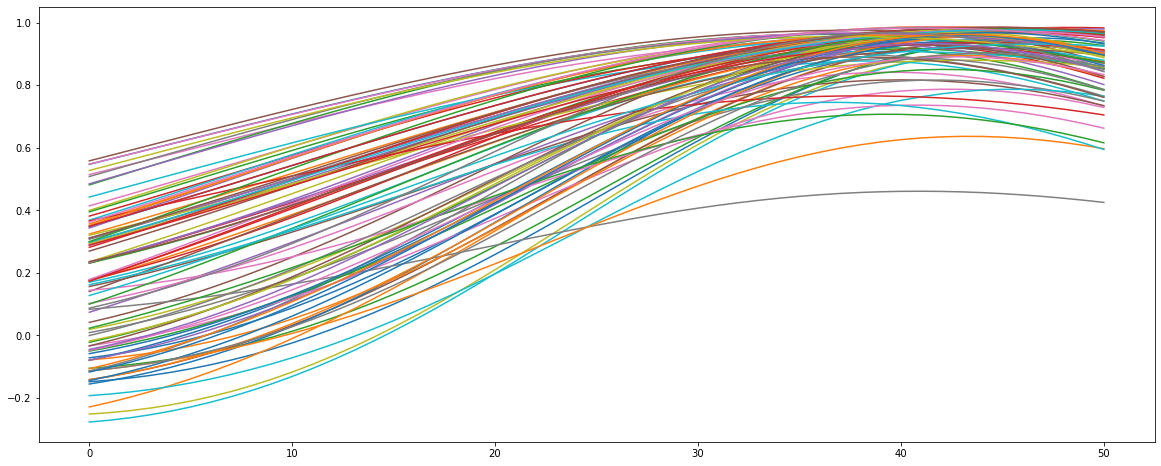

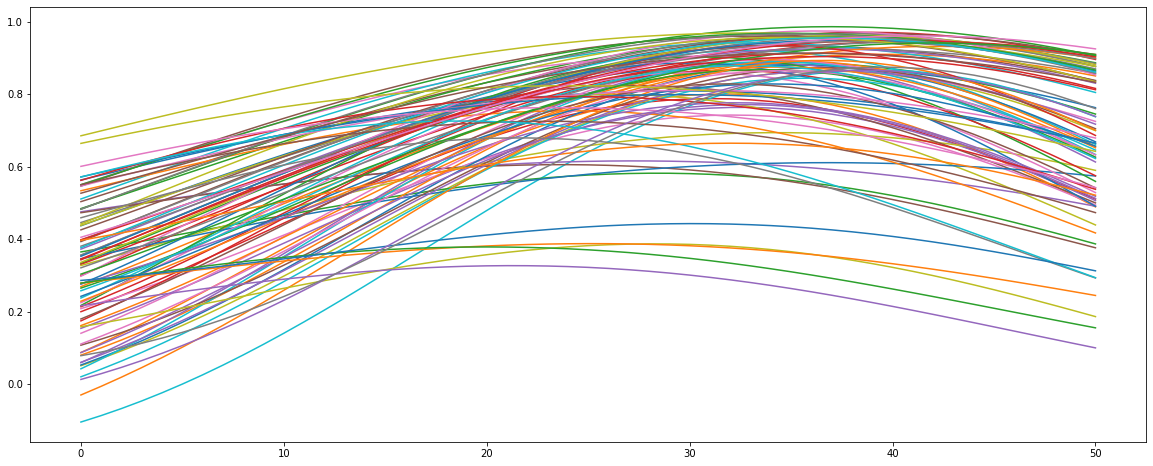

In [53]:
pandas_corr.filter(regex='pos_test').plot(figsize=(20,8), legend=False)
pandas_corr.filter(regex='vit_test').plot(figsize=(20,8), legend=False)